🧪 1. Modellträning & jämförelse
Träna följande modeller på din train/test-split:

Logistic Regression

KNN (med olika k)

Random Forest

(Extra) Decision Tree eller andra

→ Jämför modellerna med:

accuracy_score

classification_report

confusion_matrix


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()


🎯 2. PCA + Modellkombination
Använd PCA för att reducera till t.ex. 2 eller 5 dimensioner

Träna Logistic Regression / KNN på PCA-transformerad data

Jämför resultat före och efter PCA

In [ ]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Noggrannhet:", accuracy_score(y_test, y_pred))
    print("Konfusionsmatris:\n", confusion_matrix(y_test, y_pred))
    print("Klassificeringsrapport:\n", classification_report(y_test, y_pred))

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
print("\n📌 Logistic Regression:")
evaluate_model(log_model, X_test, y_test)





📌 Logistic Regression:
Noggrannhet: 0.8648648648648649
Konfusionsmatris:
 [[372  10]
 [ 50  12]]
Klassificeringsrapport:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93       382
           1       0.55      0.19      0.29        62

    accuracy                           0.86       444
   macro avg       0.71      0.58      0.61       444
weighted avg       0.83      0.86      0.84       444



✅ Klass 0: de som inte svarade
Precision: 0.88 → modellen gissar rätt nästan alltid när den säger "nej".

Recall: 0.97 → modellen hittar nästan alla som faktiskt inte svarade.

❌ Klass 1: de som svarade
Precision: 0.55 → när modellen säger "ja", har den bara rätt i 55 % av fallen.

Recall: 0.19 → betyder att:

Av 100 personer som faktiskt svarade på kampanjen, hittade modellen bara 19 av dem!

Vad betyder detta för ett företag?
Vi vill hitta de kunder som är intresserade, alltså klass 1.

Men modellen missar 81 % av dessa vilken betyder att modellen inte hjälper företaget hitta nya affärsmöjligheter.

Om vi använder denna modell för marknadsföring:

Den kommer undervärdera potentiella kunder som faktiskt skulle ha svarat.

Det kan leda till att företaget missar lönsamma kontakter.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("\n📌 KNN Classifier (k=5):")
evaluate_model(knn, X_test, y_test)



📌 KNN Classifier (k=5):
Noggrannhet: 0.8873873873873874
Konfusionsmatris:
 [[369  13]
 [ 37  25]]
Klassificeringsrapport:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       382
           1       0.66      0.40      0.50        62

    accuracy                           0.89       444
   macro avg       0.78      0.68      0.72       444
weighted avg       0.87      0.89      0.88       444



Förbättring jämfört med Logistic Regression:
Recall för klass 1 ökade från 0.19 → 0.40

F1-score för klass 1 ökade från 0.29 → 0.50

Total noggrannhet förbättrades från 86% → 88%

👉 Det betyder att KNN bättre hittar de kunder som faktiskt svarade på kampanjen – även om den fortfarande missar 60%.

C:\Users\riddl\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


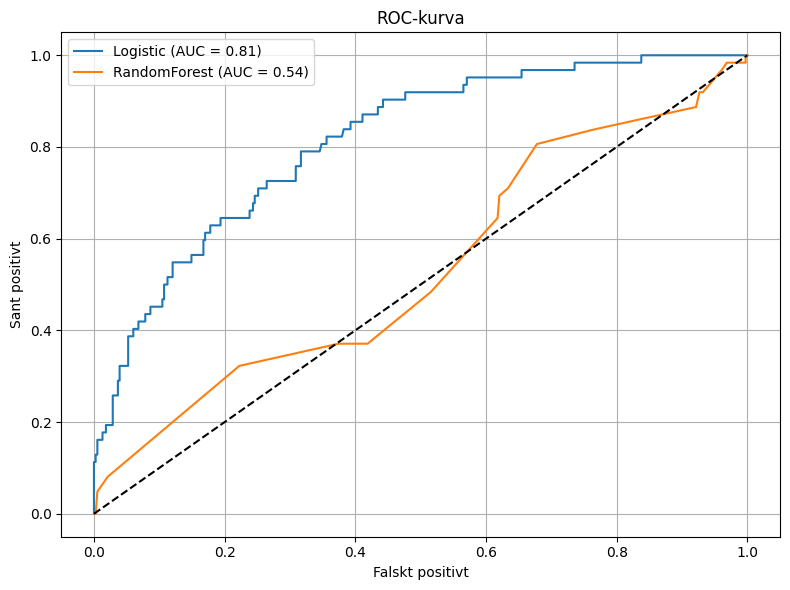

In [37]:
# Scale X_test using the existing scaler
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Plot ROC curves
plt.figure(figsize=(8,6))
for model, name in zip([log_model, rf], ["Logistic", "RandomForest"]):
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC-kurva")
plt.xlabel("Falskt positivt")
plt.ylabel("Sant positivt")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



📊 3. Modellutvärdering
Kolla:

Precision, Recall, F1-score

ROC-kurvor

Feature importance (för t.ex. Random Forest)


🧠 4. Affärstolkning & databerättelse
Besvara t.ex.:

Vad säger modellen om vilka kunder som svarar på kampanjer?

Vad kan ett företag göra med den informationen?

Hur kan detta förbättra segmentering eller ROI?